In [31]:
import os
import json
import shutil
from tqdm import tqdm

In [36]:
coco_dir = "/ssd_data/gohar/coco"
annotations_dir = os.path.join(coco_dir, "annotations")
ins_train = "instances_train2014.json"
caps_train = "captions_train2014.json"
per_train = "person_keypoints_train2014.json"
per_val = "person_keypoints_val2014.json"

train_dir = os.path.join(coco_dir, "train2014")
train_people_dir = os.path.join(coco_dir, "train2014_people")
os.makedirs(train_people_dir, exist_ok=True)

val_dir = os.path.join(coco_dir, "val2014")
val_people_dir = os.path.join(coco_dir, "val2014_people")
os.makedirs(val_people_dir, exist_ok=True)

In [3]:
with open(os.path.join(annotations_dir, per_train), 'r') as f:
    per_train_json = json.load(f)

In [16]:
print(len(per_train_json["images"]))
print(len(per_train_json["annotations"]))

82783
185316


In [27]:
image_ids = []
for ann in tqdm(per_train_json["annotations"]):
    # print(ann)
    # print(ann["image_id"])
    image_ids.append(ann["image_id"])
    # break

print(len(image_ids))
image_ids = set(image_ids)
print(len(image_ids))

100%|██████████| 185316/185316 [00:01<00:00, 124978.72it/s]


185316
45174


In [34]:
for im in tqdm(per_train_json["images"]):
    if im["id"] in image_ids:
        file_name = im["file_name"]
        
        shutil.copy(os.path.join(train_dir, file_name), train_people_dir)
        # break
    # break

100%|██████████| 82783/82783 [04:19<00:00, 319.42it/s]


In [37]:
with open(os.path.join(annotations_dir, per_val), 'r') as f:
    per_val_json = json.load(f)

In [38]:
print(len(per_val_json["images"]))
print(len(per_val_json["annotations"]))

40504
88153


In [39]:
image_ids = []
for ann in tqdm(per_val_json["annotations"]):
    # print(ann)
    # print(ann["image_id"])
    image_ids.append(ann["image_id"])
    # break

print(len(image_ids))
image_ids = set(image_ids)
print(len(image_ids))

100%|██████████| 88153/88153 [00:00<00:00, 132076.96it/s]


88153
21634


In [40]:
for im in tqdm(per_val_json["images"]):
    if im["id"] in image_ids:
        file_name = im["file_name"]
        
        shutil.copy(os.path.join(val_dir, file_name), val_people_dir)
        # break
    # break

100%|██████████| 40504/40504 [03:40<00:00, 183.84it/s]


## View random images

In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
im_dir = "/ssd_data/gohar/coco/stgan/val2014_dark_mod/"

rand_im_files = random.sample(os.listdir(im_dir), 25)

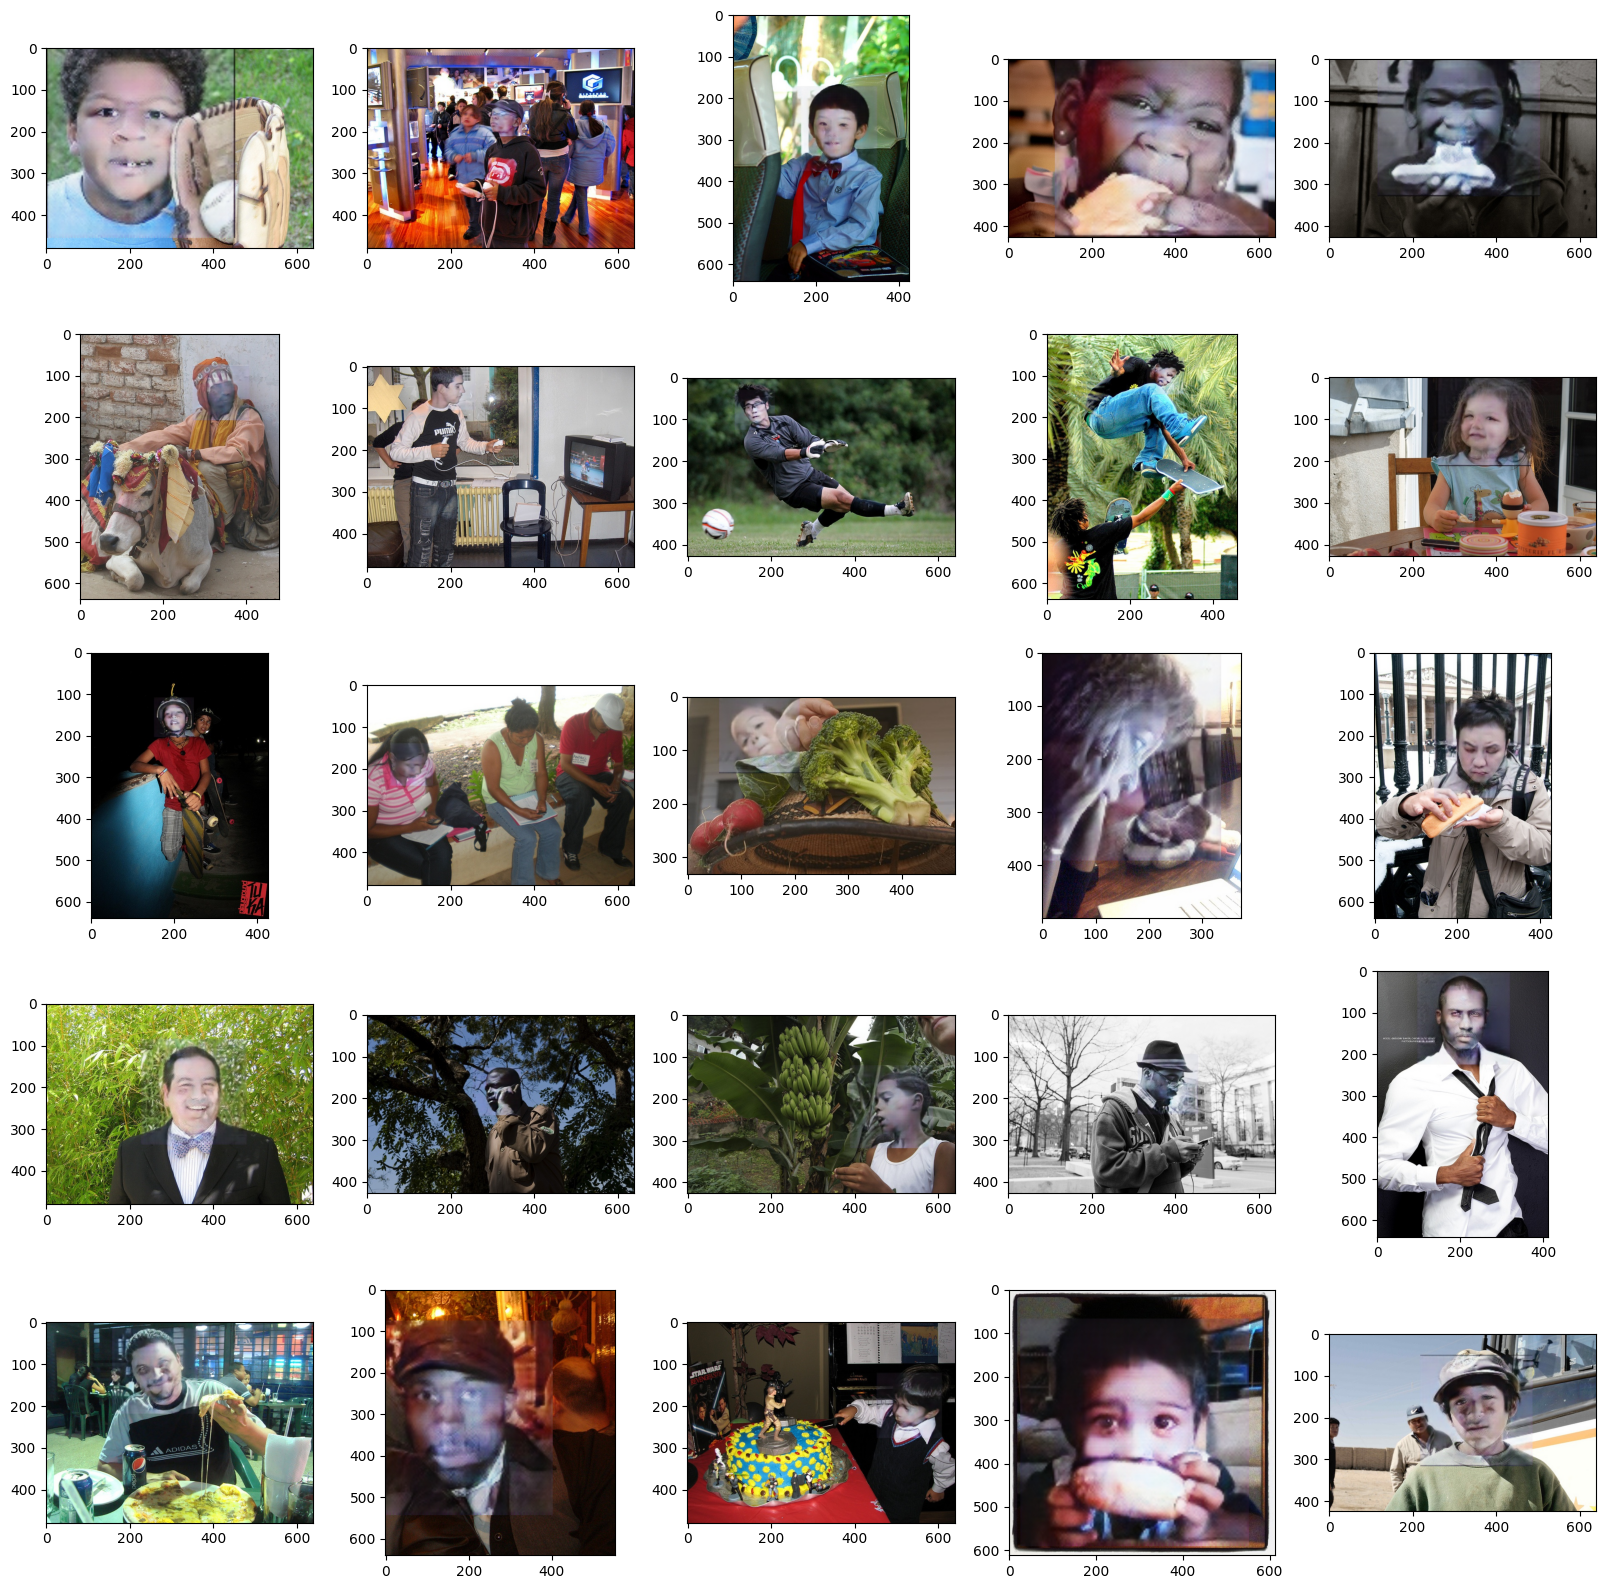

In [5]:
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i, file in enumerate(rand_im_files):
    im = cv2.imread(os.path.join(im_dir, file))

    ax = axs[i//5, i%5]
    ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    # break

## Change names to include det index


In [15]:
for file in os.listdir("/ssd_data/gohar/coco/val2014_faces_dark/"):
    name = file.split(".")[0]
    face_file = [i for i in os.listdir("/ssd_data/gohar/coco/val2014_faces/") if name in i]
    # if len(face_file) != 1:
    #     os.remove(f"/ssd_data/gohar/coco/val2014_faces_dark/{file}")
    #     continue
    assert len(face_file) == 1
    
    face_file = face_file[0]
    det = face_file.split(".")[0].split("_")[-1]

    os.rename(f"/ssd_data/gohar/coco/val2014_faces_dark/{file}", f"/ssd_data/gohar/coco/val2014_faces_dark/{name}_{det}.png")
    
    # if det != '0':
    #     print(name)
    #     print(face_file)
    #     print(det)
    #     print(f"/ssd_data/gohar/coco/val2014_faces_female/{file}")
    #     print(f"/ssd_data/gohar/coco/val2014_faces_female/{name}_{det}.png")
    #     break

In [26]:
for file in os.listdir("/ssd_data/gohar/coco/val2014_faces_female/"):
    new = file.replace("jpg", "png")
    os.rename(f"/ssd_data/gohar/coco/val2014_faces_female/{file}", f"/ssd_data/gohar/coco/val2014_faces_female/{new}")
    # break

In [ ]:
for file in os.listdir("/ssd_data/gohar/coco/val2014_faces_dark/"):
    